# Problem Statement

Understand the page view data form the data available for all the web pages from different languages and help AdEase figure out how their ads will perform on pages in different languages by creating a forecasting model which forecasts the views for the web pages.

In [154]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools

In [125]:
# Importing the data
df = pd.read_csv('Copy of train_1.csv')
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
df_exog = pd.read_csv('Copy of Exog_Campaign_eng')
df_exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [5]:
# Checking the shape of the data

print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')

Number of Rows: 145063
Number of Columns: 551


In [6]:
# Checking the shape of Exog data

print(f'Number of Rows: {df_exog.shape[0]}')
print(f'Number of Columns: {df_exog.shape[1]}')

Number of Rows: 550
Number of Columns: 1


In [7]:
# Checking the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


# Data Cleaning
- Extracting the usefull data from Page column 
  - Column format (SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN)
- Converting the data to required format

In [8]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [139]:
# Extracting access type and access origin info from page column
df_test = df['Page'].str.split('.org')
df_test = df_test.str[1]
df_test = df_test.str.split('_', expand = True)

# Filtering the columns
df_at_rg = df_test.iloc[:,1:3]

# Merging the DataFrame
df = df.merge(df_at_rg, right_index = True, left_index = True, how = 'left')
df.rename(columns = {1:'Access_type', 2:'Access_origin'}, inplace = True)

In [9]:
# Creating a language column out of page info
df_lang = df['Page'].str.split('.')
df_lang = df_lang.str[0]
df_lang = df_lang.str.split('_', expand = True)

# Adding the language data to the original data
df_lang.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2NE1,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2PM,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3C,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4minute,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,52,Hz,I,Love,You,zh,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,5566,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,91Days,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,A'N'D,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,AKB48,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,ASCII,zh,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [10]:
# Extracting the last language for each page

last_valid_index = []
for i in range(len(df_lang)):
  ser = df_lang.iloc[i,:]
  last_valid_index.append(ser.last_valid_index())

# creating list of languages for each page

last_valid_val = []
for i in range(len(last_valid_index)):
  val = df_lang.loc[i,last_valid_index[i]]
  last_valid_val.append(val)

In [142]:
# Adding language column to the data
df['language'] = last_valid_val

# We will only consider records with limited languages as we don't have language for every web page
languages = ['zh','fr','en','de','es','ru','ja']

# Filtering out unnecessary webpages
df = df[df['language'].isin(languages)]

**Null Value Treatment**

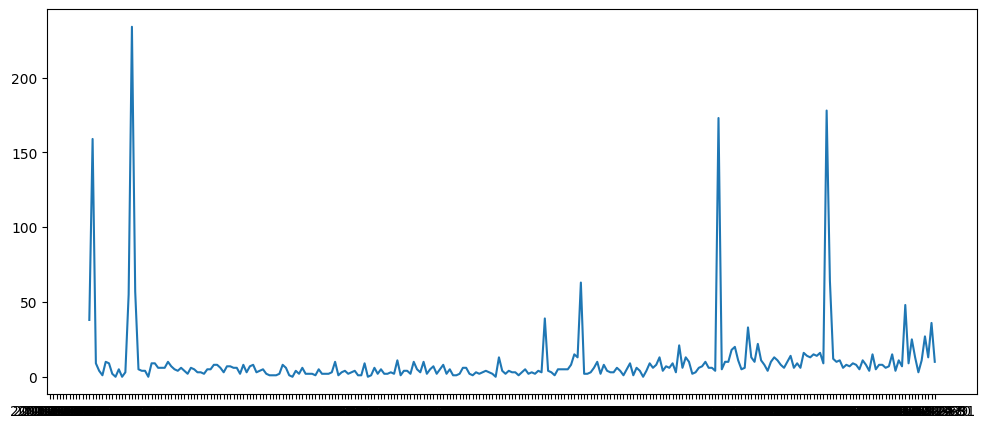

In [12]:
# Checking the pattern in null values

x = df[df['Page'] == df.iloc[4,0]].iloc[:,1:-1].T
x.columns = ['data']

plt.figure(figsize = (12,5))
plt.plot(x['data'])
plt.show()

- Looking at the above graph it's clear that the null are at the start, which suggests that those particular pages didn't exist during that period
- Therefore we will replace the null values with 0

In [143]:
# Null value treatment
df.fillna(0, inplace = True)

In [144]:
# Dropping the page column
df = df.drop('Page', axis = 1)

In [15]:
# Transforming the data to right format
df_new = df.groupby('language').sum().T
df_new.reset_index(inplace = True)
df_new.columns = ['Date', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'zh']
df_new['Date'] = pd.to_datetime(df_new['Date'])

In [16]:
df_new.head()

,Date,de,en,es,fr,ja,ru,zh
0,2015-07-01,13113068.0,83476451.0,15222171.0,8429828.0,11818687.0,9431015.0,4135827.0
1,2015-07-02,12971313.0,83225255.0,14544728.0,8484861.0,13570229.0,9596018.0,4142363.0
2,2015-07-03,12458820.0,79079296.0,13369917.0,8156289.0,12252427.0,8891118.0,4115414.0
3,2015-07-04,11423941.0,82422822.0,12553157.0,8720435.0,15387963.0,8360557.0,4155582.0
4,2015-07-05,13276714.0,85120651.0,13663918.0,8560018.0,14775371.0,8905671.0,4433966.0


In [17]:
# Creating new columns from Date
df_new['Year'] = df_new['Date'].dt.year
df_new['Month'] = df_new['Date'].dt.month
df_new['Day'] = df_new['Date'].dt.day
df_new['Week_no'] = df_new['Date'].dt.week

<ipython-input-17-34abaeb33a35>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new['Week_no'] = df_new['Date'].dt.week


In [18]:
df_new.head()

,Date,de,en,es,fr,ja,ru,zh,Year,Month,Day,Week_no
0,2015-07-01,13113068.0,83476451.0,15222171.0,8429828.0,11818687.0,9431015.0,4135827.0,2015,7,1,27
1,2015-07-02,12971313.0,83225255.0,14544728.0,8484861.0,13570229.0,9596018.0,4142363.0,2015,7,2,27
2,2015-07-03,12458820.0,79079296.0,13369917.0,8156289.0,12252427.0,8891118.0,4115414.0,2015,7,3,27
3,2015-07-04,11423941.0,82422822.0,12553157.0,8720435.0,15387963.0,8360557.0,4155582.0,2015,7,4,27
4,2015-07-05,13276714.0,85120651.0,13663918.0,8560018.0,14775371.0,8905671.0,4433966.0,2015,7,5,27


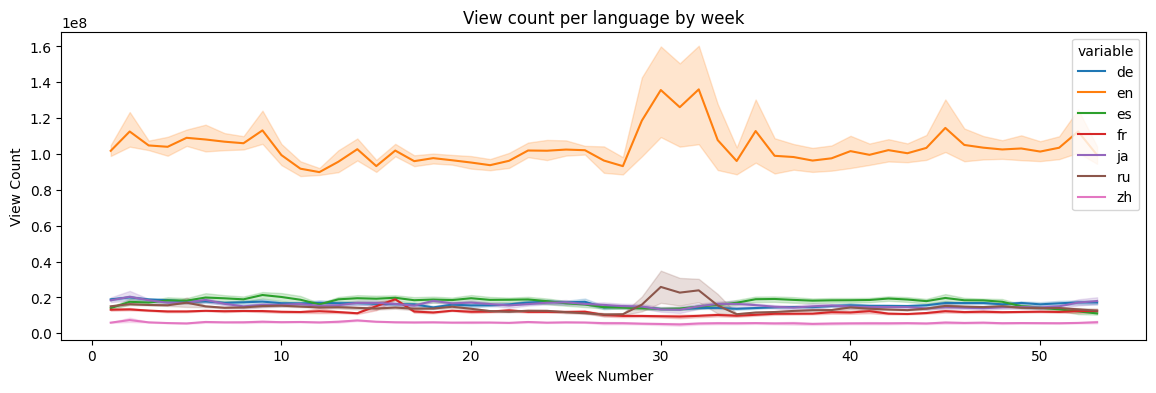

In [19]:
# View count per week for each language

# Creating a dataset
df_plot = pd.melt(df_new[['Week_no', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'zh']], id_vars = ['Week_no'])

# Plotting
plt.figure(figsize = (14,4))
sns.lineplot(df_plot, x = 'Week_no', y = 'value', hue = 'variable')
plt.title('View count per language by week')
plt.xlabel('Week Number')
plt.ylabel('View Count')
plt.show()

- The above graph clearly shows very high view count for english wesites compared to others

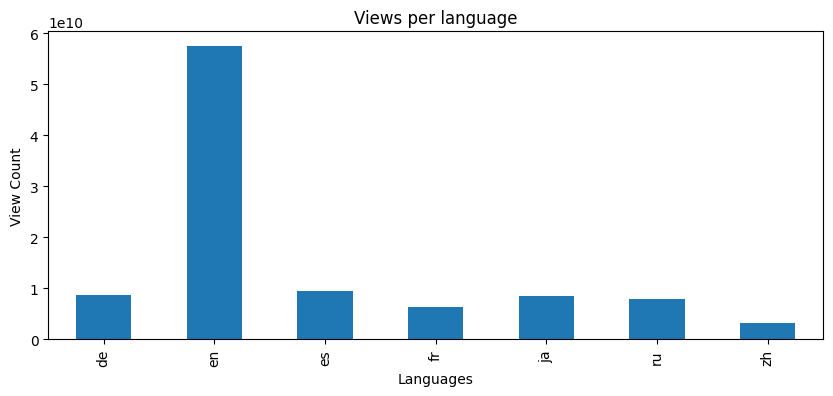

In [153]:
# Views per language
df_plot.groupby('variable')['value'].sum().plot(kind = 'bar', figsize = (10,4))
plt.title('Views per language')
plt.ylabel('View Count')
plt.xlabel('Languages')
plt.show()

- English webpages have the best view count followed by spanish and german languages

## Data Preprocessing
- We will only use English language data for building the model and then build function so that we can use data from other languages as well 

In [20]:
df_eng = df_new[['Date','en']]
df_eng.set_index('Date', inplace = True)
df_eng.head()

,en
Date,
2015-07-01,83476451.0
2015-07-02,83225255.0
2015-07-03,79079296.0
2015-07-04,82422822.0
2015-07-05,85120651.0


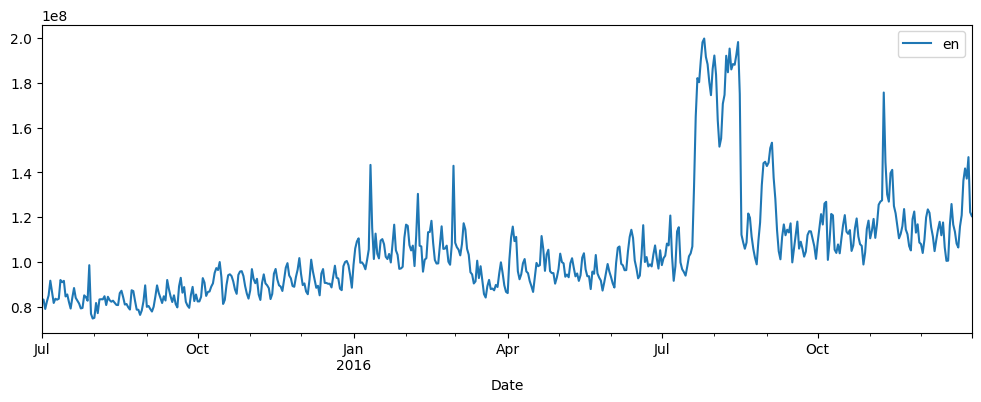

In [21]:
df_eng.plot(figsize = (12,4))
plt.show()

- The above timeseries has a trend, but it doesn't seem to have any seasonality in the long term and is non stationary.

<Axes: xlabel='Date'>

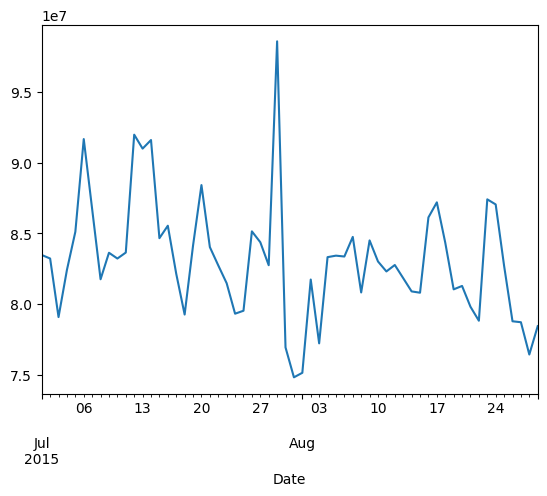

In [22]:
# Checking for seasonality
df_eng.en[:60].plot()

- The view count is fluctating a lot and can't say if it has any seasnality, however the regular spikes might indicate a weekly seasonality in the view counts.

### Stationarity Check

In [23]:
import statsmodels.api as sm

In [24]:
def stationarity_test(data, sig_val = 0.05):
  p_value = sm.tsa.stattools.adfuller(data)[1]
  if p_value < 0.05:
    print('The data is stationary')
  else:
    print('The data is non stationary')

In [25]:
stationarity_test(df_eng['en'], 0.05)

The data is non stationary


- As expected the data is non stationary and we need to make it stationary.

**Using data decomposition**

<Figure size 1200x600 with 0 Axes>

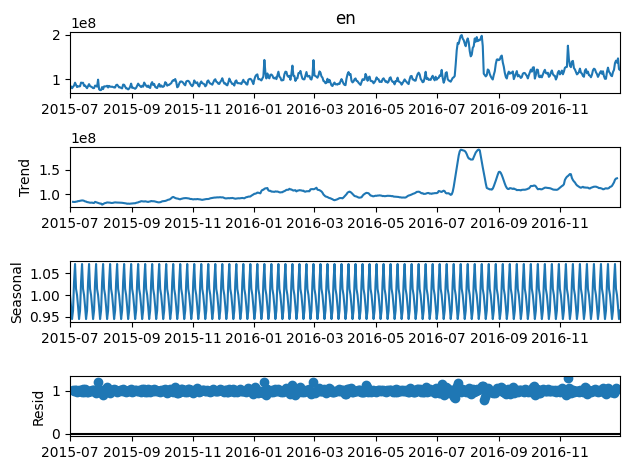

In [26]:
plt.figure(figsize = (12,6))
series = df_eng['en']
result = seasonal_decompose(series, model='multiplicative')
result.plot()
plt.show()

**Using Differentiation method**

<Axes: xlabel='Date'>

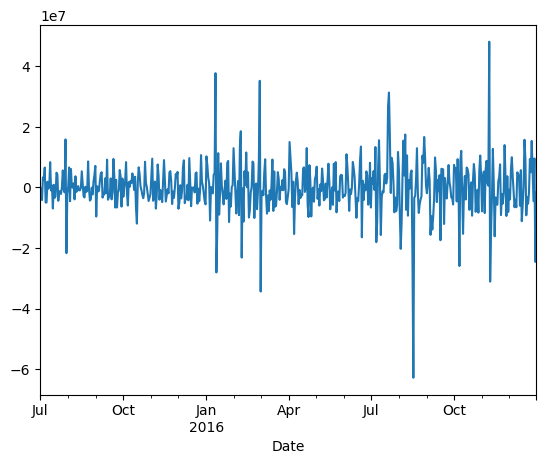

In [27]:
# Using Differentiation method

stationary_data = df_eng['en'].diff()
stationary_data.plot()

In [28]:
# Checking the stationarity again
stationarity_test(stationary_data.dropna())

The data is stationary


- Differentiating the data once is enough to make it stationary
- The stationarity is also confirmed by the Dickey fuller test

### Model training and forecasting with ARIMA, SARIMA & SARIMAX

**ACF and PACF**

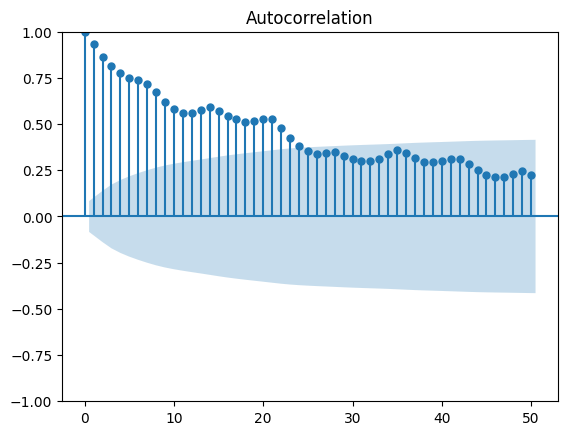

In [30]:
plot_acf(df_eng.en, lags = 50)
plt.show()

- The acf plots show a good correlation for almost last 20 to 22 days. Hence we can use last 20-22 days data for forecasting purpose

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


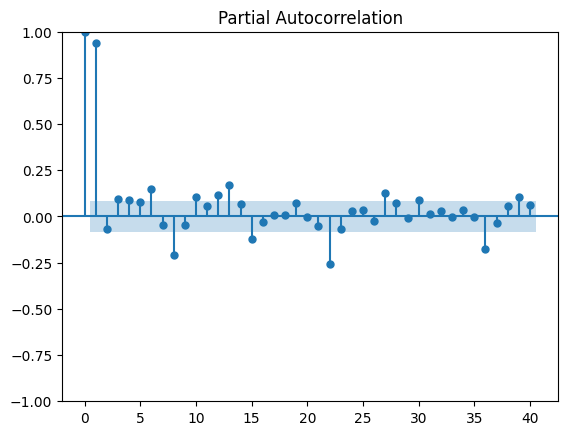

In [31]:
plot_pacf(df_eng.en, lags = 40)
plt.show()

- The above plot suggest we should only look at one day prior data for forecasting. Looking at more previous data doesn't add much value.

### Training Models

In [32]:
# Function to calculate model performance

def model_performance(y_true, y_pred):
  mae = np.mean(np.abs(y_true - y_pred))
  rsme = np.sqrt(np.mean((y_true - y_pred)**2))
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

  print(f'MAE : {mae}\nRSME : {rsme}\nMAPE : {mape}')

**ARIMA**

- p: the number of autoregressive (AR) terms
- d: the degree of differencing
- q: the number of moving average (MA) terms
- P: the number of seasonal autoregressive (SAR) terms
- D: the degree of seasonal differencing
- Q: the number of seasonal moving average (SMA) terms
- s: the number of time steps in a seasonal cycle
- exog: the external regressors

In [33]:
# Splitting the data into train and test
train_x = df_eng.en[:-30].reset_index()
test_x = df_eng.en[-30:].reset_index()

train_x.set_index('Date', inplace = True)
test_x.set_index('Date', inplace = True)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 7607122.968413762
RSME : 11756070.60654439
MAPE : 6.007676414988517


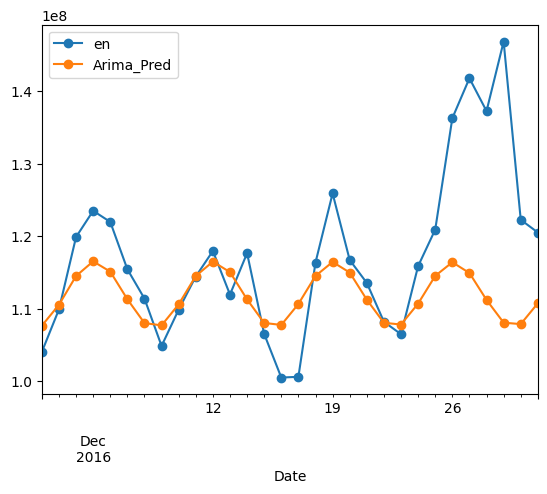

In [34]:
# ARIMA model
ARIMA = sm.tsa.statespace.SARIMAX(train_x.en, order = (3,1,3))
model = ARIMA.fit(disp = False)

# Forecasting
test_x['Arima_Pred'] = model.forecast(30)

# Model Performance
model_performance(test_x['en'], test_x['Arima_Pred'])


# Plotting the predictions
test_x.plot(style = '-o')
plt.show()

- The above model was built with 
  - p = 3 
  - d = 1 as we only need to differentiate data once to make it stationary
  - q = 3 
- The above ARIMA model performed fairly good as we had an MAPE of 6.12% 

**Seasonal ARIMA**

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 7444249.861526632
RSME : 11284335.047953978
MAPE : 5.886243717540099


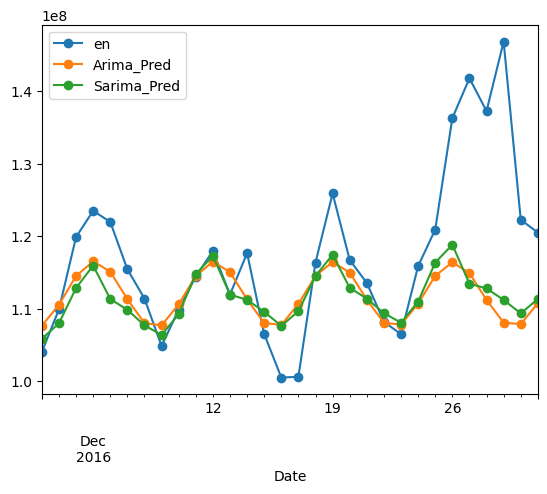

In [37]:
# Trying seasonal ARIMA to tackle the seasonality in the data
# SARIMA model 
SARIMA = sm.tsa.statespace.SARIMAX(train_x.en, order = (3,1,3), seasonal_order = (1,0,1,14))
model = SARIMA.fit(disp = False)

# Forecasting
test_x['Sarima_Pred'] = model.forecast(30)

# Model Performance
model_performance(test_x['en'], test_x['Sarima_Pred'])

# Plotting the predictions
test_x.plot(style = '-o')
plt.show()

- The seasonal ARIMA model performed a bit better than the ARIMA model, pulling an MAPE of 5.83% over 6.12% from ARIMA model.
- As there is not much seasonality and to keep the model simple we will tune the hyperparameters for ARIMA model to get the best performance. 

## Functionized code for all languages

In [219]:
# Selecting appropriate language
def selecting_lang(data, language):
  df_lang = data[['Date', language]]
  df_lang.set_index('Date', inplace = True)
  return df_lang

# Function to test stationarity and make the data stationary
def stationarity_test(data, sig_val = 0.05):
  p_value = sm.tsa.stattools.adfuller(data)[1]
  
  while p_value > 0.05:
    data = data.diff()
    p_value = sm.tsa.stattools.adfuller(data)[1]
  
  return data


# Function to calculate model performance
def model_performance(y_true, y_pred):
  mae = np.mean(np.abs(y_true - y_pred))
  rsme = np.sqrt(np.mean((y_true - y_pred)**2))
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

  print(f'MAE : {mae}\nRSME : {rsme}\nMAPE : {mape}')


# Split data into train and validation sets
def data_splitting(data):
  train_size = int(len(data) * 0.8)
  train, test = data.iloc[:train_size], data.iloc[train_size:]
  return train, test

def ARIMA_model(train, test, ord = (1,0,1)):
  # ARIMA model
  ARIMA = sm.tsa.statespace.SARIMAX(train.iloc[:,0], order = ord)
  model = ARIMA.fit(disp = False)

  # Forecasting
  test['Arima_Pred'] = model.forecast(len(test))

  # Model Performance
  model_performance(test.iloc[:,0], test['Arima_Pred'])

  # Plotting the predictions
  return test.plot(style = '-o')


def SARIMA_model(train, test, ord = (1,0,1), sea_ord = (1,0,1,14)):
  # ARIMA model
  ARIMA = sm.tsa.statespace.SARIMAX(train.iloc[:,0], order = ord, seasonal_order = sea_ord)
  model = ARIMA.fit(disp = False)

  # Forecasting
  test['Arima_Pred'] = model.forecast(len(test))

  # Model Performance
  model_performance(test.iloc[:,0], test['Arima_Pred'])

  # Plotting the predictions
  return test.plot(style = '-o')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 2404979.716041308
RSME : 3139174.375949138
MAPE : 15.72229761849962


<ipython-input-219-8b6d30d41a3d>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Arima_Pred'] = model.forecast(len(test))


<Axes: xlabel='Date'>

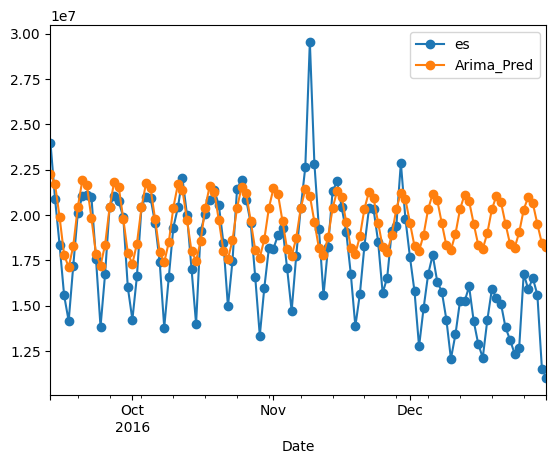

In [220]:
# Forecasting for spanish
df1 = selecting_lang(df_new,'es')
df1 = stationarity_test(df1)
train, test = data_splitting(df1)
ARIMA_model(train, test, (3,1,5))

**SARIMA with exogenous variable (SARIMAX)**

In [40]:
print(f'Shape of exogenous data : {df_exog.shape}')
print(f'Shape of englisg data : {df_eng.shape}')

Shape of exogenous data : (550, 1)
Shape of englisg data : (550, 1)


In [47]:
# Adding exogenous data to english dataframe

df_eng['Exog_var'] = df_exog.Exog.tolist()
df_eng.head()

<ipython-input-47-6b45651194ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['Exog_var'] = df_exog.Exog.tolist()


,en,Exog_var
Date,,
2015-07-01,83476451.0,0
2015-07-02,83225255.0,0
2015-07-03,79079296.0,0
2015-07-04,82422822.0,0
2015-07-05,85120651.0,0


In [56]:
# Splitting the data into train and test
train_x = df_eng[:-30].reset_index()
test_x = df_eng[-30:].reset_index()

train_x.set_index('Date', inplace = True)
test_x.set_index('Date', inplace = True)

In [65]:
# Trying seasonal ARIMA to tackle the seasonality in the data
# SARIMA model 
SARIMA = sm.tsa.statespace.SARIMAX(train_x['en'], order = (3,1,3), exog = train_x['Exog_var'], seasonal_order = (1,0,1,14))
model = SARIMA.fit(disp = False)

# Forecasting
# test_x['Sarima_Pred'] = model.forecast(30)

# Model Performance
predictions = model.predict(start = test_x.index[0], end = test_x.index[-1], exog = test_x['Exog_var'])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
# Creating a dataframe
exog_results = test_x[['en']]
exog_results['exog_pred'] = predictions

MAE : 5931662.66799654
RSME : 7857091.002882075
MAPE : 4.8619027208989944


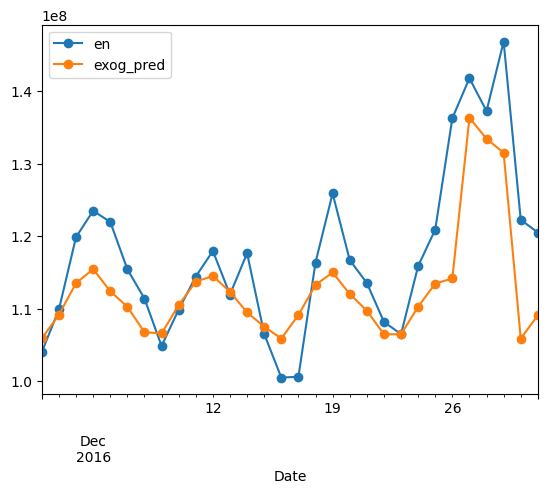

In [72]:
# Model Predictions
# Model Performance
model_performance(exog_results['en'], exog_results['exog_pred'])

# Plotting the predictions
exog_results.plot(style = '-o')
plt.show()

- Using the exogenous variable had clearly helped with the forecast as the MAPE is 4.86% which is better than both the ARIMA and SARIMA models.

### Facebook Prophet Model

In [83]:
# !pip install pystan~=2.14
# !pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826165 sha256=6a3ac1d7a4cf208242e65801f638e775fa2c7bb58b72b560e0cba9d2dc813842
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0


In [87]:
# Data Preparation
# To use facebook fbprophet library we need to change the column names to ds for datetime index and y for value to predict

df_fbp = pd.DataFrame({'ds':df_eng.index, 'y': df_eng.en})
df_fbp.reset_index(drop = True, inplace = True)
df_fbp.head()

,ds,y
0,2015-07-01,83476451.0
1,2015-07-02,83225255.0
2,2015-07-03,79079296.0
3,2015-07-04,82422822.0
4,2015-07-05,85120651.0


In [85]:
from fbprophet import Prophet

In [105]:
# Splitting the data into train and test
train = df_fbp[:-30].reset_index()
test = df_fbp[-30:].reset_index()

# train.set_index('Date', inplace = True)
# test.set_index('Date', inplace = True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


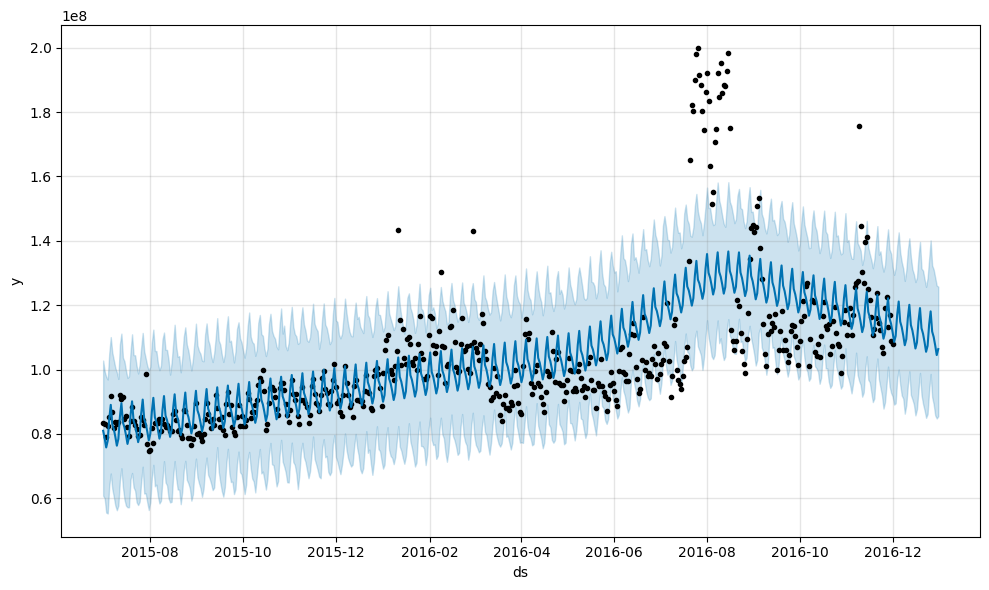

In [91]:
# instantiate the model and fit the timeseries
prophet = Prophet()
prophet.fit(train)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30)
forecast = prophet.predict(future)

# plot
fig = prophet.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


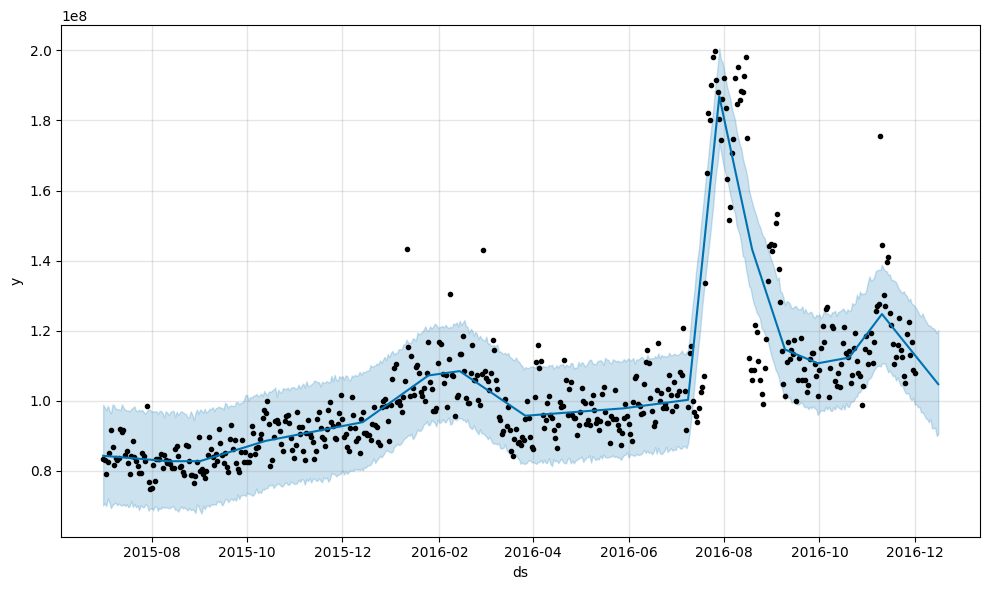

In [107]:
# Adjusting hyperparameters for better forecasting results

# instantiate the model and fit the timeseries
prophet1 = Prophet(weekly_seasonality=False, changepoint_range=1,changepoint_prior_scale=0.75)
prophet1.fit(train)

# create a future data frame 
future1 = prophet1.make_future_dataframe(periods=15)
forecast1 = prophet1.predict(future1)

# plot
fig = prophet1.plot(forecast1)

# Questionnaire

1. Defining the problem statements and where can this and modifications of this be used?
  - Modifications of this model can be used for forecasting multiple things like:
    - Forecasting of ad impressions, clicks, views in the digital marketing industry
    - Forecasting video view counts for influencers 

2. Write 3 inferences you made from the data visualizations
  - English web pages had the best view counts at all the times
  - Overall the view counts have an upward trend
  - We can see a weekly seasonality in the data

3. What does the decomposition of series do?
  - It breaks down the series into different components like trend, seasonality, residuals, etc.
  - It helps us remove the trend and seasonality from the data
  
4. What level of differencing gave you a stationary series?
  - One level of differenceing was enough to get a stationary series

5. Difference between arima, sarima & sarimax.
  - ARIMA is a model used to forecast non seasonal time series data. It includes three components: Autoregression (AR), Moving Average (MA), and Integration (I)
  - SARIMA is a model used to forecast seasonal time series data. The seasonal components in SARIMA models are represented by the seasonal AR and MA terms, which capture the seasonality in the data
  - SARIMAX is an extension of ARIMA model that includes both seasonal and exogenous components. It takes into consideration the exogenous components to make the forecasts.

6. Compare the number of views in different languages
  - English has the best view count almost 5-6 times of the other languages,followed by the spanish and the German languages.